# **TRABALHO T2**

Estudo Introdut√≥rio a Recomenda√ß√µes e ao Algoritmo K-Nearest Neighbors
Este notebook apresenta um estudo referente √† metodologias de recomenda√ß√£o de filmes a um determinado usu√°rio, seguindo diferentes heur√≠sticas para tal.
O dataset utilizado para este estudo pode ser encontrado no seguinte link do site GroupLens: https://grouplens.org/datasets/movielens/latest/.

***UTILIZE O MAIOR DATASET DISPON√çVEL NESTE LINK PARA FAZER O TRABALHO!***

In [1]:
# Importando bibliotecas necess√°rias para o estudo
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
# Lendo o dataset relacionado aos filmes
movies = pd.read_csv('../data/movies.csv')
movies

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
...        ...                                                ...   
86532   288967               State of Siege: Temple Attack (2021)   
86533   288971                                 Ouija Japan (2021)   
86534   288975   The Men Who Made the Movies: Howard Hawks (1973)   
86535   288977                    Skinford: Death Sentence (2023)   
86536   288983  UNZIPPED: An Autopsy of American Inequality (2...   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
86532                                 Action|Drama  
86533                                Action|Horror  
86534                                  Documentary  
86535                               Crime|Thriller  
86536                                  Documentary  

[86537 rows x 3 columns]

In [3]:
# Transformando coluna movieID em √≠ndice
movies.set_index('movieId', inplace = True)
movies

title  \
movieId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
...                                                    ...   
288967                State of Siege: Temple Attack (2021)   
288971                                  Ouija Japan (2021)   
288975    The Men Who Made the Movies: Howard Hawks (1973)   
288977                     Skinford: Death Sentence (2023)   
288983   UNZIPPED: An Autopsy of American Inequality (2...   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  
...                                              ...  
288967                                  Action|Drama  
288971                                 Action|Horror  
288975                                   Documentary  
288977                                Crime|Thriller  
288983                                   Documentary  

[86537 rows x 2 columns]

Conhecendo o Dataframe
O Dataframe 'movies' possui informa√ß√µes a respeito dos filmes analisados, sendo estas:

**MovieId**: Identifica√ß√£o √∫nica de cada filme.

**title**: O t√≠tulo de cada filme, junto com o ano de lan√ßamento.

**genres**: O g√™nero, ou conjunto de g√™neros, de cada filme.


In [4]:
# Lendo o dataset relacionado √†s avalia√ß√µes dos usu√°rios
ratings = pd.read_csv('../data/ratings.csv')
ratings

userId  movieId  rating   timestamp
0              1        1     4.0  1225734739
1              1      110     4.0  1225865086
2              1      158     4.0  1225733503
3              1      260     4.5  1225735204
4              1      356     5.0  1225735119
...          ...      ...     ...         ...
33832157  330975     8340     2.0  1091583256
33832158  330975     8493     2.5  1091585709
33832159  330975     8622     4.0  1091581777
33832160  330975     8665     3.0  1091581765
33832161  330975     8783     2.5  1091581799

[33832162 rows x 4 columns]

In [5]:
# Transformando coluna userId em √≠ndice
ratings.set_index('userId', inplace = True)
ratings

movieId  rating   timestamp
userId                             
1             1     4.0  1225734739
1           110     4.0  1225865086
1           158     4.0  1225733503
1           260     4.5  1225735204
1           356     5.0  1225735119
...         ...     ...         ...
330975     8340     2.0  1091583256
330975     8493     2.5  1091585709
330975     8622     4.0  1091581777
330975     8665     3.0  1091581765
330975     8783     2.5  1091581799

[33832162 rows x 3 columns]

Conhecendo o segundo dataframe
O Dataframe 'ratings' possui informa√ß√µes a respeito das an√°lises feitas pelos usu√°rios, sendo estas:

**userId**: Identifica√ß√£o √∫nica de cada usu√°rio presente no dataframe.

**movieId**: Identifica√ß√£o √∫nica de cada filme presente no dataframe 'movies', visto anteriormente.

**rating**: A avalia√ß√£o feita por aquele usu√°rio √†quele filme espec√≠fico.

**timestamp**: De acordo com o site MovieLens (https://files.grouplens.org/datasets/movielens/ml-10m-README.html), representam os segundos que se passaram desde a meia-noite(UTC) do dia 1¬∫ de Janeiro de 1970

In [6]:
# Informa√ß√µes a respeito das avalia√ß√µes informadas pelos usu√°rios
ratings.rating.describe().round(2)

count    33832162.00
mean            3.54
std             1.06
min             0.50
25%             3.00
50%             4.00
75%             4.00
max             5.00
Name: rating, dtype: float64

In [7]:
# N√∫mero de usu√°rios contidos dentro do dataset
ratings.index.nunique()

330975

## **1. Primeira Tentativa de Recomenda√ß√£o**

Sem ter qualquer tipo de informa√ß√£o pr√©via a respeito do usu√°rio e seus gostos, podemos recomend√°-lo dez filmes de acordo com duas diferentes m√©tricas:

1¬∫ - Os dez filmes mais avaliados.

2¬∫ - Os dez filmes mais bem avaliados.

In [8]:
# Vamos avaliar as informa√ß√µes das notas de acordo com os filmes
# Utilizando o m√©todo value_counts(), podemos identificar os filmes que mais receberam avalia√ß√µes
ratings['movieId'].value_counts()

movieId
318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
212773         1
194901         1
194572         1
194002         1
193301         1
Name: count, Length: 83239, dtype: int64

In [9]:
# O filme mais avaliado do dataset √© o 318. Buscamos no √≠ndice por esse movieId
movies.loc[[318]]

title       genres
movieId                                               
318      Shawshank Redemption, The (1994)  Crime|Drama

In [10]:
# Criando coluna que contabiliza o n√∫mero de avalia√ß√µes
movies['number_of_ratings'] = ratings['movieId'].value_counts()

# Criando coluna que calcula a nota m√©dia de avalia√ß√µes e definindo duas casas decimais de
# arredondamento.
movies['average_ratings'] = ratings.groupby('movieId').rating.mean().round(2)

# Visualizando o Dataframe
movies

title  \
movieId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
...                                                    ...   
288967                State of Siege: Temple Attack (2021)   
288971                                  Ouija Japan (2021)   
288975    The Men Who Made the Movies: Howard Hawks (1973)   
288977                     Skinford: Death Sentence (2023)   
288983   UNZIPPED: An Autopsy of American Inequality (2...   

                                              genres  number_of_ratings  \
movieId                                                                   
1        Adventure|Animation|Children|Comedy|Fantasy            76813.0   
2                         Adventure|Children|Fantasy            30209.0   
3                                     Comedy|Romance            15820.0   
4                               Comedy|Drama|Romance             3028.0   
5                                             Comedy            15801.0   
...                                              ...                ...   
288967                                  Action|Drama                1.0   
288971                                 Action|Horror                1.0   
288975                                   Documentary                1.0   
288977                                Crime|Thriller                1.0   
288983                                   Documentary                1.0   

         average_ratings  
movieId                   
1                   3.89  
2                   3.28  
3                   3.17  
4                   2.87  
5                   3.08  
...                  ...  
288967              3.50  
288971              0.50  
288975              4.00  
288977              3.00  
288983              3.00  

[86537 rows x 4 columns]

# **1.1. Recomendando os dez filmes mais avaliados**

In [11]:
# Para visualizarmos os dez filmes mais avaliados, basta utilizarmo o m√©todo sort_values()
# e ordenarmos o dataframe pela coluna 'number_of_ratings' de forma decrescente.
movies.sort_values('number_of_ratings', ascending = False).head(10)

title  \
movieId                                                      
318                       Shawshank Redemption, The (1994)   
356                                    Forrest Gump (1994)   
296                                    Pulp Fiction (1994)   
2571                                    Matrix, The (1999)   
593                       Silence of the Lambs, The (1991)   
260              Star Wars: Episode IV - A New Hope (1977)   
2959                                     Fight Club (1999)   
527                                Schindler's List (1993)   
480                                   Jurassic Park (1993)   
1196     Star Wars: Episode V - The Empire Strikes Back...   

                                   genres  number_of_ratings  average_ratings  
movieId                                                                        
318                           Crime|Drama           122296.0             4.42  
356              Comedy|Drama|Romance|War           113581.0             4.07  
296           Comedy|Crime|Drama|Thriller           108756.0             4.19  
2571               Action|Sci-Fi|Thriller           107056.0             4.16  
593                 Crime|Horror|Thriller           101802.0             4.15  
260               Action|Adventure|Sci-Fi            97202.0             4.09  
2959          Action|Crime|Drama|Thriller            86207.0             4.24  
527                             Drama|War            84232.0             4.24  
480      Action|Adventure|Sci-Fi|Thriller            83026.0             3.69  
1196              Action|Adventure|Sci-Fi            80200.0             4.12

Utilizando como base o n√∫mero total de avalia√ß√µes, os dez primeiros filmes que podemos indicar a um novo usu√°rio s√£o os listados acima!

## **1.2. Recomendando os dez filmes mais bem avaliados**

In [12]:
# Para visualizar os dez filmes mais bem avaliados, basta usar o mesmo m√©todo sort_values()
# para ordenar a coluna 'average_ratings' de forma decrescente.
# Entretanto, √© necess√°rio filtrar a coluna 'number_of_ratings', definindo um n√∫mero m√≠nimo
# de avalia√ß√µes que um filme deva ter para aparecer no Dataframe, evitando que filmes de nicho,
# pouco avaliados, apare√ßam como mais bem votados.

# Definimos um n√∫mero m√≠nimo de avalia√ß√µes de 1000
movies.query('number_of_ratings >= 1000').sort_values('average_ratings', ascending = False).head(10)

title            genres  \
movieId                                                       
171011             Planet Earth II (2016)       Documentary   
159817                Planet Earth (2006)       Documentary   
318      Shawshank Redemption, The (1994)       Crime|Drama   
170705            Band of Brothers (2001)  Action|Drama|War   
858                 Godfather, The (1972)       Crime|Drama   
202439                    Parasite (2019)      Comedy|Drama   
179135              Blue Planet II (2017)       Documentary   
198185                  Twin Peaks (1989)     Drama|Mystery   
1203                  12 Angry Men (1957)             Drama   
1221       Godfather: Part II, The (1974)       Crime|Drama   

         number_of_ratings  average_ratings  
movieId                                      
171011              2041.0             4.45  
159817              3015.0             4.45  
318               122296.0             4.42  
170705              2835.0             4.42  
858                75004.0             4.33  
202439             12399.0             4.33  
179135              1267.0             4.31  
198185              1132.0             4.30  
1203               22730.0             4.27  
1221               47271.0             4.27

## **2. Recomenda√ß√£o pela Similaridade de G√™nero**

Presumindo que sabemos que o usu√°rio j√° assitiu alguns filmes e que os IDs destes filmes s√£o 1,21,19,10,11,7 e 2, podemos utilizar esta informa√ß√£o para indicar a ele novos filmes de g√™neros similares √†queles que ele assistiu, sem levar em conta, entretanto, suas avalia√ß√µes a respeito destes filmes!

In [13]:
# Criando uma lista de filmes assistidos
watched_movies = [1,21,19,10,11,7,2]
# Visualizando quais filmes s√£o estes
movies.loc[watched_movies]

title  \
movieId                                          
1                             Toy Story (1995)   
21                           Get Shorty (1995)   
19       Ace Ventura: When Nature Calls (1995)   
10                            GoldenEye (1995)   
11              American President, The (1995)   
7                               Sabrina (1995)   
2                               Jumanji (1995)   

                                              genres  number_of_ratings  \
movieId                                                                   
1        Adventure|Animation|Children|Comedy|Fantasy            76813.0   
21                             Comedy|Crime|Thriller            26183.0   
19                                            Comedy            26642.0   
10                         Action|Adventure|Thriller            34942.0   
11                              Comedy|Drama|Romance            20256.0   
7                                     Comedy|Romance            15596.0   
2                         Adventure|Children|Fantasy            30209.0   

         average_ratings  
movieId                   
1                   3.89  
21                  3.57  
19                  2.67  
10                  3.43  
11                  3.66  
7                   3.37  
2                   3.28

**Filmes de G√™nero Similares**

Observando que o √∫ltimo filme assistido, Jumanji, encontra-se na categoria Adventure|Children|Fantasy, buscamos filmes de categorias similares e recomendamos ao usu√°rio estes filmes ordenando-os de acordo com a m√©dia de avalia√ß√µes, tamb√©m filtrando o n√∫mero de avalia√ß√µes, evitando recomendar filmes pouco avaliados.

In [14]:
# Buscamos filmes que tenham, no minimo, 100 avalia√ß√µes dentro da categoria.
# M√©todo drop() utilizado para evitar que o usu√°rio receba recomenda√ß√µes de filmes j√° assistidos.
movies.query("genres == 'Adventure|Children|Fantasy'").query('number_of_ratings >= 100').sort_values(
'average_ratings', ascending = False).drop(watched_movies, errors = 'ignore').head(10)

title  \
movieId                                                      
4896     Harry Potter and the Sorcerer's Stone (a.k.a. ...   
80748                           Alice in Wonderland (1933)   
2161                         NeverEnding Story, The (1984)   
50601                          Bridge to Terabithia (2007)   
41566    Chronicles of Narnia: The Lion, the Witch and ...   
2043             Darby O'Gill and the Little People (1959)   
82169    Chronicles of Narnia: The Voyage of the Dawn T...   
59501     Chronicles of Narnia: Prince Caspian, The (2008)   
160573                                Pete's Dragon (2016)   
1009                       Escape to Witch Mountain (1975)   

                             genres  number_of_ratings  average_ratings  
movieId                                                                  
4896     Adventure|Children|Fantasy            36127.0             3.70  
80748    Adventure|Children|Fantasy              125.0             3.52  
2161     Adventure|Children|Fantasy            13617.0             3.52  
50601    Adventure|Children|Fantasy             2697.0             3.44  
41566    Adventure|Children|Fantasy            17042.0             3.39  
2043     Adventure|Children|Fantasy             1217.0             3.28  
82169    Adventure|Children|Fantasy             2968.0             3.28  
59501    Adventure|Children|Fantasy             4646.0             3.19  
160573   Adventure|Children|Fantasy              458.0             3.16  
1009     Adventure|Children|Fantasy             2862.0             3.14

# **3. Recomenda√ß√µes por Similaridades Entre Usu√°rios**

**Calculando a dist√¢ncia euclidiana**

Outra abordagem que podemos utilizar √© a recomenda√ß√£o atrav√©s da similaridade entre usu√°rios.
Sabendo que Jo√£o, Maria e Joana assistiram, cada um, os mesmos dois filmes (x e y) e os avaliaram, podemos realizar o c√°lculo da dist√¢ncia euclidiana entre estes tr√™s usu√°rios por meio do teorema de Pit√°goras para identificarmos a similaridade entre seus gostos.

Text(0.5, 1.0, 'Calculando a dist√¢ncia entre dois usu√°rios')

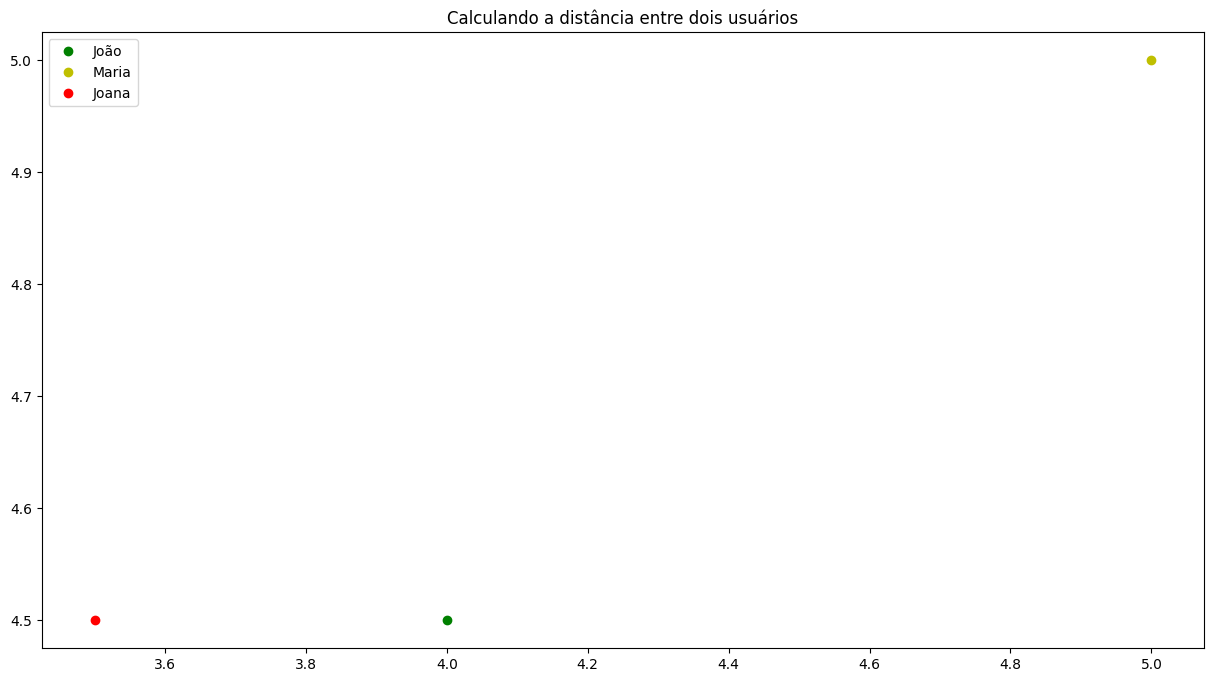

In [15]:
# Vamos supor que Jo√£o, Maria e Joana fizeram as seguintes avalia√ß√µes dos mesmos filmes
joao = np.array([4,4.5])
maria = np.array([5,5])
joana = np.array([3.5,4.5])

# Podemos plotar em um gr√°fico para visualizarmos as diferentes avalia√ß√µes por cada um deles
plt.figure(figsize=(15,8))
plt.plot(4, 4.5,"go") # Avalia√ß√µes de Jo√£o representadas por um c√≠rculo verde
plt.plot(5, 5,"yo") # Avalia√ß√µes de Maria representadas por um c√≠rculo amarelo
plt.plot(3.5,4.5,"ro") # Avalia√ß√µes de Joana representadas por um c√≠rculo vermelho
plt.legend(['Jo√£o','Maria','Joana'])
plt.title("Calculando a dist√¢ncia entre dois usu√°rios")

Sabendo as avalia√ß√µes de cada um dos tr√™s usu√°rios, podemos utilizar o m√©todo linalg.norm() do Numpy para calcularmos as dist√¢ncias euclidianas entre eles.

In [16]:
# Criando fun√ß√£o que fa√ßa o c√°lculo da dist√¢ncia euclidiana
def distance(a,b):
    return round(np.linalg.norm(a - b), 2) # m√©todo round para exibir apenas 2 n√∫meros decimais

In [17]:
# Medindo as dist√¢ncias entre Jo√£o, Maria e Joana
print(f'A dist√¢ncia de Jo√£o e Maria √© de {distance(joao,maria)}')
print(f'A dist√¢ncia de Jo√£o e Joana √© de {distance(joao,joana)}')

A dist√¢ncia de Jo√£o e Maria √© de 1.12
A dist√¢ncia de Jo√£o e Joana √© de 0.5


Atrav√©s do c√°lculo da dist√¢ncia euclidiana entre Jo√£o, Maria e Joana, podemos perceber que Joana est√° muito mais pr√≥xima de Jo√£o do que de Maria, ou seja, Jo√£o e Maria possuem gostos similares, de acordo com suas avalia√ß√µes dos mesmos filmes.
Sabendo de tal similaridade, faz sentido recomendar √† Joana os filmes que Jo√£o assistiu e gostou.

**3.1. Aplicando o C√°lculo de Dist√¢ncia Euclidiana em Dois Usu√°rios do Dataset**

Vamos supor que queremos recomendar filmes ao userId 1 e vamos calcular qual √© a sua dist√¢ncia do userId 4.

In [18]:
# Definindo fun√ß√£o para extrair informa√ßoes a respeito das avalia√ß√µes de cada usu√°rio
def user_ratings(userId):
    user_ratings = ratings.query('userId == %d' % userId)[['movieId','rating']].set_index('movieId')
    return user_ratings

In [19]:
# Testando a fun√ß√£o e extraindo o movieId e a avalia√ß√£o do userId 1 de cada filme indexado
user_ratings(1)

rating
movieId        
1           4.0
110         4.0
158         4.0
260         4.5
356         5.0
...         ...
40629       4.5
49647       5.0
52458       5.0
53996       5.0
54259       4.0

[62 rows x 1 columns]

In [20]:
# Extraindo as avalia√ß√µes do userId 4
user_ratings(4)

rating
movieId        
260         5.0
318         5.0
356         5.0
595         4.5
858         3.0
915         4.0
1097        3.5
2324        5.0
2858        4.0
4306        4.5
5618        5.0
5995        5.0
8368        4.0
8533        4.0
40629       5.0
40815       4.0
46578       4.0
48394       5.0
50872       5.0
68954       5.0
69844       4.5
79091       5.0
79132       4.0
81834       5.0
109487      4.5
112556      4.5
113741      3.0
134853      5.0
135518      3.5
135887      2.5

In [21]:
# Definindo uma fun√ß√£o que extraia as avalia√ß√µes de dois userIds informados, junte-os em um mesmo
# dataframe e calcule a dist√¢ncia euclidiana entre eles

def euclidean_distance(userId1,userId2):
    userId1_ratings = user_ratings(userId1)
    userId2_ratings = user_ratings(userId2)
    join_df = userId1_ratings.join(userId2_ratings, lsuffix = '_user1',
                                  rsuffix = '_user2').dropna()
    distance_users = distance(join_df.rating_user1,join_df.rating_user2)
    return print(f'A dist√¢ncia entre o usu√°rio {userId1} e {userId2} √© {distance_users}')

In [22]:
# Calculando a dist√¢ncia entre o userId 1 e userId 4
euclidean_distance(1,4)

A dist√¢ncia entre o usu√°rio 1 e 4 √© 1.32


# **4. Algoritmo K-Nearest Neighbors**

O K-nearest neighbors, podendo ser chamado tamb√©m de 'K-vizinhos mais pr√≥ximos' √© um algoritmo de machine learning muito usado para realizar classifica√ß√µes.
Supondo que tenhamos o seguinte conjunto de dados, dividido em duas classes: azul e vermelho, e temos um dado espec√≠fico que n√£o est√° classificado, identificado pela cor verde na imagem abaixo:
knn.jpg
O algoritmo KNN √© utilizado para calcular as dist√¢ncias entre este dado n√£o-categorizado com os K-vizinhos mais pr√≥ximos, ou seja, os vizinhos cuja dist√¢ncia sejam menores.
No caso da imagem acima, se informarmos o par√¢metro K = 3, o algoritmo ir√° calcular a dist√¢ncia entre o dado n√£o-categorizado com os tr√™s dados categorizados mais pr√≥ximos e, neste caso, ir√° categorizar o dado verde como sendo pertencente √† classe vermelha.

<img src="../images/KNN2.png">

O algoritmo KNN √© utilizado para calcular as dist√¢ncias entre este dado n√£o-categorizado com os K-vizinhos mais pr√≥ximos, ou seja, os vizinhos cuja dist√¢ncia sejam menores.
No caso da imagem acima, se informarmos o par√¢metro K = 3, o algoritmo ir√° calcular a dist√¢ncia entre o dado n√£o-categorizado com os tr√™s dados categorizados mais pr√≥ximos e, neste caso, ir√° categorizar o dado verde como sendo pertencente √† classe vermelha.

**(Insira aqui a imagem knn.jpg)**

<img src="../images/image.png">

A dist√¢ncia euclidiana √© uma das mais usadas no algoritmo KNN para calcular a dist√¢ncia entre dados de um conjunto e, utilizando as fun√ß√µes anteriores criadas neste estudo, podemos definir novas fun√ß√µes, construindo um algoritmo KNN do zero, para identificar usu√°rios com gostos similares em nosso dataset e recomendar filmes se baseando no grau de proximidade entre eles.

In [23]:
# Refinando a fun√ß√£o euclidean_distance() para filtrar usu√°rios que sejam muito distantes, ou
# usu√°rios que n√£o tenham nenhum filme em comum avaliados.
# 'minimum' se refere a quantidade m√≠nima de filmes avaliados entre usu√°rios diferentes
def euclidean_distance(userId1,userId2, minimum = 5):
    userId1_ratings = user_ratings(userId1)
    userId2_ratings = user_ratings(userId2)
    join_df = userId1_ratings.join(userId2_ratings, lsuffix = '_user1',
                                  rsuffix = '_user2').dropna()

    if(len(join_df) < minimum):
        return None

    distance_users = distance(join_df.rating_user1,join_df.rating_user2)
    return [userId1, userId2, distance_users]

In [24]:
# Definindo fun√ß√£o que fa√ßa o c√°lculo da dist√¢ncia de diversos usu√°rios
# Considerando que h√° um n√∫mero muito alto de usu√°rios, o par√¢metro users_to_verify pode ser
# usado para definir o n√∫mero de usu√°rios que ser√£o verificados para calcular a dist√¢ncia dentro
# do dataframe.
# ex: se users_to_verify = 50, apenas os 50 primeiros usu√°rios do dataframe ser√£o verificados
def distance_from_all(informed_user, users_to_verify = None):
    all_users = ratings.index.unique()
    if users_to_verify:
        all_users = all_users[:users_to_verify]
    distance_all_users = [euclidean_distance(informed_user,userId) for userId in all_users]
    distance_all_users = list(filter(None, distance_all_users))
    distance_all_users = pd.DataFrame(distance_all_users, columns = ['informed_user','others','distance'])
    return distance_all_users

In [25]:
# Definindo fun√ß√£o que calcule a dist√¢ncia dos K-vizinhos mais pr√≥ximos
# k_nearest_neighbors √© o par√¢metro que deve ser dado para informar quais vizinhos mais pr√≥ximos
# ser√£o analizados. Por padr√£o, o algoritmo ir√° verificar apenas os 10 vizinhos mais pr√≥xmos, ou
# seja, os 10 usu√°rios mais similares ao usu√°rio informado
def knn(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
    distance_users = distance_from_all(informed_user, users_to_verify = users_to_verify)
    distance_users = distance_users.sort_values('distance')
    distance_users = distance_users.set_index('others').drop(informed_user, errors = 'ignore')
    return distance_users.head(k_nearest_neighbors)

In [26]:
# Definindo fun√ß√£o de sugest√µes
def suggestions_for_user(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
    informed_user_ratings = user_ratings(informed_user)
    movies_seen_by_informed_user = informed_user_ratings.index

    similar = knn(informed_user, k_nearest_neighbors=k_nearest_neighbors,users_to_verify=users_to_verify)
    similar_users = similar.index
    similar_users_ratings = ratings.loc[similar_users]
    recommendations = round(similar_users_ratings.groupby('movieId').mean()[['rating']], 2)
    fequency = similar_users_ratings.groupby('movieId').count()[['rating']]

   #minimum_filter cria um filtro para mostrar apenas t√≠tulos que tenham sido avaliados por,
   # no m√≠nimo, a metade dos k-vizinhos mais pr√≥ximos
    minimum_filter = k_nearest_neighbors / 2
    recommendations = recommendations.join(fequency, lsuffix = '_mean_others',rsuffix='_frequency_others')
    recommendations = recommendations.query('rating_frequency_others >= %.2f' % minimum_filter)
    recommendations = recommendations.sort_values('rating_mean_others', ascending = False)
    recommendations = recommendations.drop(movies_seen_by_informed_user, errors = 'ignore')
    return recommendations.join(movies)

In [27]:
# Testando as recomenda√ß√µes para o usu√°rio 1, analizando os primeiros 500 usu√°rios do dataframe
# Por defini√ß√£o, os k-vizinhos mais pr√≥ximos dos 500 primeiros usu√°rios s√£o os 10 usu√°rios
# mais pr√≥ximos cujas avalia√ß√µes ser√£o relevantes para a recomenda√ß√£o.
#head(10) exibe os dez filmes ordenados pela avalia√ß√£o m√©dia dos K-Vizinhos mais pr√≥ximos.
suggestions_for_user(1,users_to_verify=500).head(10)

rating_mean_others  rating_frequency_others  \
movieId                                                
318                     4.3                        5   
858                     4.3                        5   
2858                    4.0                        5   

                                    title         genres  number_of_ratings  \
movieId                                                                       
318      Shawshank Redemption, The (1994)    Crime|Drama           122296.0   
858                 Godfather, The (1972)    Crime|Drama            75004.0   
2858               American Beauty (1999)  Drama|Romance            69902.0   

         average_ratings  
movieId                   
318                 4.42  
858                 4.33  
2858                4.10

# **OBSERVA√á√ÉO**

A fun√ß√£o suggestion_for_user recebe como par√¢metro o userId do usu√°rio que desejamos recomendar os filmes, os k-vizinhos mais pr√≥ximos - k_nearest_neighbors(10 por padr√£o) e a quantidade de usu√°rios para terem suas dist√¢ncias calculadas dentro do dataset -users_to_verify(por padr√£o, todo o dataset √© inclu√≠do).
O dataframe de recomenda√ß√µes recebeu duas novas colunas, sendo elas a rating_mean_others, que representa a m√©dia de avalia√ß√µes dos k-vizinhos mais pr√≥ximos, e rating_frequency_others, que mostra quantos usu√°rios, dentre os k-vizinhos, avaliaram aquele filme.
O dataframe tamb√©m √© organizado pela m√©dia das avalia√ß√µes dos k-vizinhos, em ordem decrescente, e a frequ√™ncia m√≠nima estabelecida para que o filme seja recomendado √© de 5, ou seja, ele deve ter sido avaliado por ao menos metade dos k-vizinhos selecionados.
Neste contexto, calculando as dist√¢ncias de 500 usu√°rios, encontrando os mais similares ao userID 1 de acordo com suas pr√≥prias avalia√ß√µes, os dez filmes n√£o vistos pelos userId 1 que podemos recomendar a ele s√£o os listados na c√©lula anerior.

## üßÆ 3. N√∫mero m√©dio de g√™neros por filme
Calcular a m√©dia de g√™neros atribu√≠dos a cada filme.

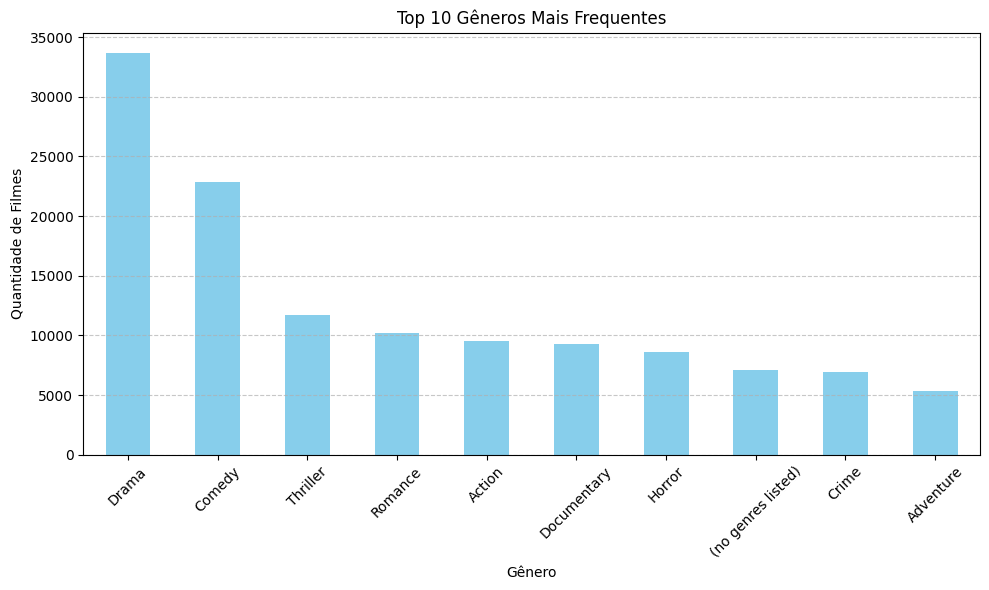

In [28]:
movies['genres_list'] = movies['genres'].str.split('|')
all_genres = movies['genres_list'].explode()

genre_counts = all_genres.value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 G√™neros Mais Frequentes')
plt.xlabel('G√™nero')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

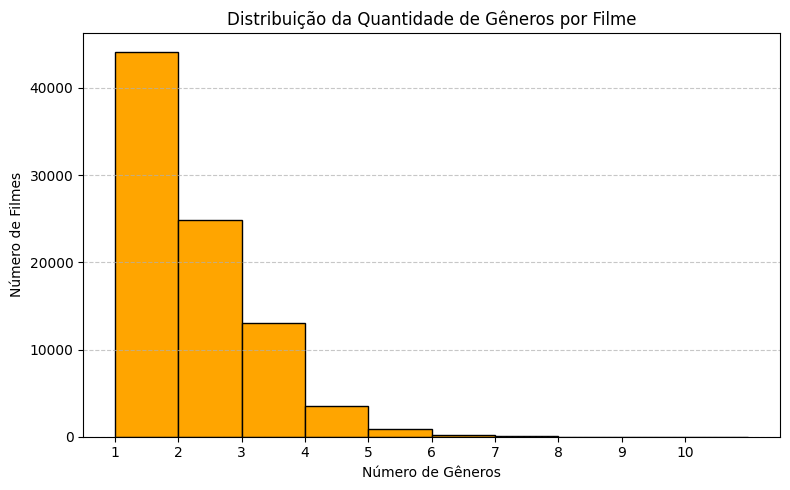

In [29]:
genre_per_movie = movies['genres_list'].apply(len)

plt.figure(figsize=(8, 5))
plt.hist(genre_per_movie, bins=range(1, genre_per_movie.max() + 2), color='orange', edgecolor='black')
plt.title('Distribui√ß√£o da Quantidade de G√™neros por Filme')
plt.xlabel('N√∫mero de G√™neros')
plt.ylabel('N√∫mero de Filmes')
plt.xticks(range(1, genre_per_movie.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

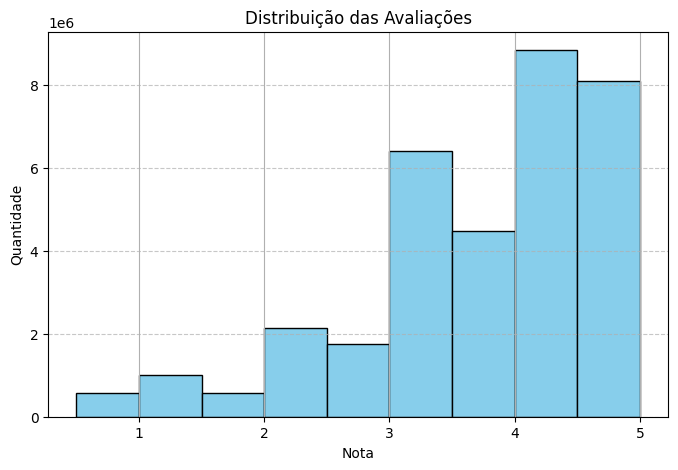

In [30]:
df = ratings.merge(movies, on='movieId')

plt.figure(figsize=(8,5))
df['rating'].hist(bins=9, edgecolor='black', color='skyblue')
plt.title('Distribui√ß√£o das Avalia√ß√µes')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
movie_stats = df.groupby(['movieId', 'title']).agg(
    nota_media=('rating', 'mean'),
    num_avaliacoes=('rating', 'count')
).reset_index()

In [32]:
min_avaliacoes = 100
top_filmes = movie_stats[movie_stats['num_avaliacoes'] >= min_avaliacoes] \
    .sort_values(by='nota_media', ascending=False).head(10)

In [33]:
print("Top 10 filmes mais bem avaliados (m√≠nimo de 100 avalia√ß√µes):")
print(top_filmes[['title', 'nota_media', 'num_avaliacoes']])

Top 10 filmes mais bem avaliados (m√≠nimo de 100 avalia√ß√µes):
                                  title  nota_media  num_avaliacoes
44214            Planet Earth II (2016)    4.451739            2041
39322               Planet Earth (2006)    4.448093            3015
44066           Band of Brothers (2001)    4.423986            2835
314    Shawshank Redemption, The (1994)    4.416792          122296
44440                            Cosmos    4.343200             625
58750                   Parasite (2019)    4.329946           12399
840               Godfather, The (1972)    4.326603           75004
47999             Blue Planet II (2017)    4.312944            1267
65984           Twelve Angry Men (1954)    4.305723             332
56804                 Twin Peaks (1989)    4.302562            1132


### Top 10 Filmes Mais Populares

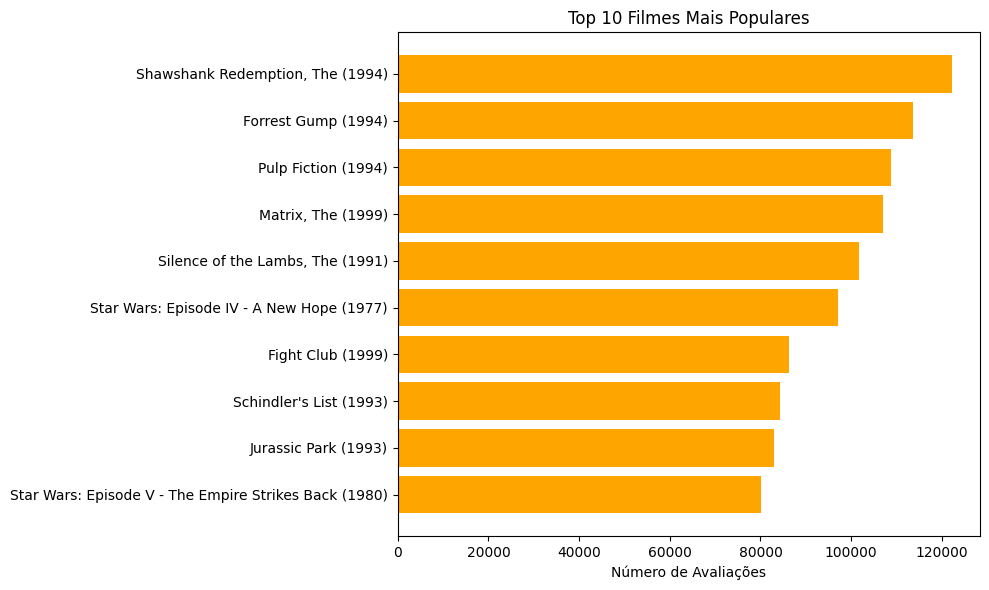

In [34]:
mais_populares = movie_stats.sort_values(by='num_avaliacoes', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(mais_populares['title'], mais_populares['num_avaliacoes'], color='orange')
plt.xlabel('N√∫mero de Avalia√ß√µes')
plt.title('Top 10 Filmes Mais Populares')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()